1.   **WAP to show the working of a neural network. (With one hidden layer only). You can use any input image dataset.**
2.    **WAP to show the working of any convolutional neural network. (For easy implementation you can consider AlexNet).**





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

# required for Question 2
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


## **Applying One hot Encoding**

*    As the labels have 10 categories then each  category need to be converted into dumies for proper output of a neural network.As the output of the neural network is probability vaues so it would require 10 target category for 1 data point to compare with the acutal target value




In [ ]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
# using 1 hidden layer
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 5)                 3925      
                                                                 
 dense_39 (Dense)            (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [ ]:
model.fit(X_train, y_train, epochs=50, 
          validation_data=(X_test,y_test))


Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8406 - acc: 0.7607 - val_loss: 0.7808 - val_acc: 0.8057
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7954 - acc: 0.7822 - val_loss: 0.7287 - val_acc: 0.8162
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7522 - acc: 0.7955 - val_loss: 0.7701 - val_acc: 0.7821
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7433 - acc: 0.8002 - val_loss: 0.6929 - val_acc: 0.8200
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7255 - acc: 0.8071 - val_loss: 0.6633 - val_acc: 0.8292
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6951 - acc: 0.8219 - val_loss: 0.6337 - val_acc: 0.8436
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6848 - acc: 0.8163 - val_loss: 0.6400 - val_acc: 0.8326
Epoch 8/50
1875/1875 [==============================] - 4s 2ms

## **Question 2**

*   **WAP to show the working of any convolutional neural network. (For easy implementation you can consider AlexNet).**

> 98.583
> 98.592
> 98.658
> 98.792
> 98.817


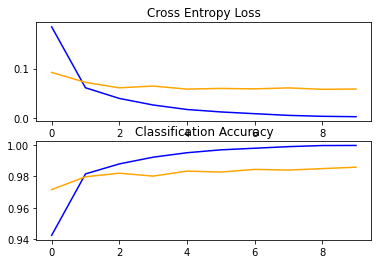

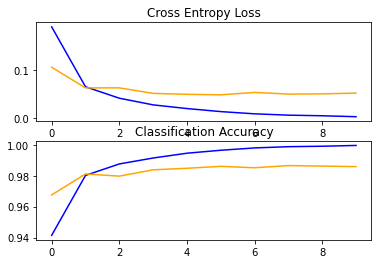

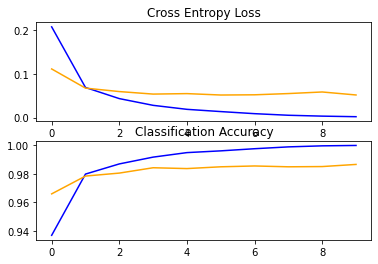

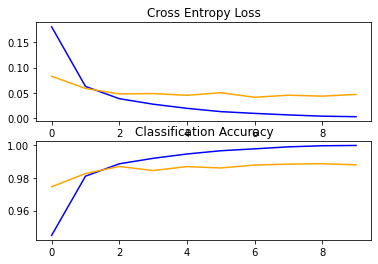

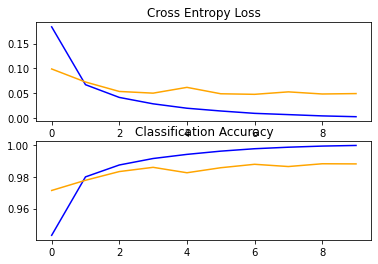

Accuracy: mean=98.688 std=0.098, n=5


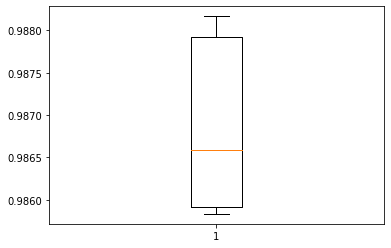

In [ ]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
    # define model
      model = define_model()
      # select rows for train and test
      trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
      # fit model
      history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
      # evaluate model
      _, acc = model.evaluate(testX, testY, verbose=0)
      print('> %.3f' % (acc * 100.0))
      # stores scores
      scores.append(acc)
      histories.append(history)
    return scores, histories
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
      # plot loss
      plt.subplot(2, 1, 1)
      plt.title('Cross Entropy Loss')
      plt.plot(histories[i].history['loss'], color='blue', label='train')
      plt.plot(histories[i].history['val_loss'], color='orange', label='test')
      # plot accuracy
      plt.subplot(2, 1, 2)
      plt.title('Classification Accuracy')
      plt.plot(histories[i].history['accuracy'], color='blue', label='train')
      plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
      plt.show()
 
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()
 
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # evaluate model
    scores, histories = evaluate_model(trainX, trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)
    
    # entry point, run the test harness
run_test_harness()